In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\KmeanClustering-main (1)\KmeanClustering-main/Social_Network_Ads.csv")

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
mydata=data.drop(["User ID"],axis=1)

In [5]:
mydata

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [6]:
x_feature=mydata.iloc[:,0:3]
x_feature

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [7]:
y_target=mydata.iloc[:,3]
y_target

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [8]:
x_feature["Gender"]=x_feature["Gender"].map({"Male":0,"Female":1})

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x_feature,y_target,test_size=.30,random_state=101)

In [11]:
Xtest

,Gender,Age,EstimatedSalary
38,1,26,72000
387,0,39,71000
270,1,43,133000
181,1,31,71000
195,0,34,43000
...,...,...,...
228,1,40,72000
178,0,24,23000
267,0,37,74000
147,1,41,30000


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
trainer=KNeighborsClassifier(n_neighbors=5)

In [14]:
learner=trainer.fit(Xtrain,Ytrain)

In [15]:
index_lable=pd.Series(["not purchased","purchased"])

In [16]:
o=learner.predict([[3,27,57000]])
print(o)
print("you are {}".format(index_lable[o]))

[0]
you are 0    not purchased
dtype: object


In [17]:
yp=learner.predict(Xtest)
ya=Ytest

In [18]:
acc_table=pd.DataFrame({"YP":list(ya),"YP":list(yp)})

In [19]:
acc_table.head()

,YP
0,0
1,0
2,1
3,0
4,0


In [20]:
from sklearn.metrics import accuracy_score

In [21]:
knn_score=accuracy_score(ya,yp)*100

In [22]:
knn_score

80.0

In [23]:
k=int(np.sqrt(len(Xtrain)))+1

In [24]:
k_range=list(range(1,k))

In [25]:
k_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [26]:
acc_list=[]
for i in range(1,k):
    knn_trainer=KNeighborsClassifier(n_neighbors=i)
    knn_learner=knn_trainer.fit(Xtrain,Ytrain)
    yknn_prediction=knn_learner.predict(Xtest)
    knn_acc=accuracy_score(yknn_prediction,ya)
    acc_list.append(knn_acc)
    print("Accuracy of knn is {} at k={}".format(knn_acc,i))

Accuracy of knn is 0.8166666666666667 at k=1
Accuracy of knn is 0.8416666666666667 at k=2
Accuracy of knn is 0.8 at k=3
Accuracy of knn is 0.8333333333333334 at k=4
Accuracy of knn is 0.8 at k=5
Accuracy of knn is 0.8333333333333334 at k=6
Accuracy of knn is 0.825 at k=7
Accuracy of knn is 0.8333333333333334 at k=8
Accuracy of knn is 0.8333333333333334 at k=9
Accuracy of knn is 0.825 at k=10
Accuracy of knn is 0.825 at k=11
Accuracy of knn is 0.825 at k=12
Accuracy of knn is 0.825 at k=13
Accuracy of knn is 0.8333333333333334 at k=14
Accuracy of knn is 0.825 at k=15
Accuracy of knn is 0.825 at k=16


In [27]:
acc_list_array=np.array(acc_list)
acc_list_array.argmax()

1

In [28]:
print("Max accuracy {} is at k={}".format(acc_list_array[acc_list_array.argmax()],acc_list_array.argmax()+1))

Max accuracy 0.8416666666666667 is at k=2


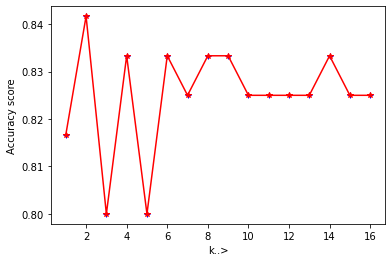

In [29]:
plt.plot(k_range,acc_list,'b+')
plt.plot(k_range,acc_list,'r*-')
plt.xlabel("k..>")
plt.ylabel("Accuracy score")
plt.show()


In [30]:
#Feature Scaling

In [31]:
x_feature.head(1)

,Gender,Age,EstimatedSalary
0,0,19,19000


In [32]:
x_feature.mean()

Gender                 0.510
Age                   37.655
EstimatedSalary    69742.500
dtype: float64

In [33]:
x_feature.std()

Gender                 0.500526
Age                   10.482877
EstimatedSalary    34096.960282
dtype: float64

In [34]:
xxfeature=x_feature

In [35]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [36]:
minMaxScaler=MinMaxScaler()
stdScaler=StandardScaler()

In [37]:
xx_scaleFeature=minMaxScaler.fit_transform(xxfeature)

In [38]:
xx_scaleFeature.mean()

0.46115873015873016

In [39]:
xx_scaleFeature.std()

0.35646532384450974

In [40]:
xx_std_scalefeature=stdScaler.fit_transform(xxfeature)

In [41]:
round(xx_std_scalefeature.mean())

0

In [42]:
round(xx_std_scalefeature.std())

1

In [43]:
#Training with xx_scalefeature

In [44]:
Xstrain,Xstest,Ystrain,Ystest=train_test_split(xx_scaleFeature,y_target,test_size=.30,random_state=101)

In [45]:
acc_list_sc=[]
for i in range(1,k):
    knn_trainer_sc=KNeighborsClassifier(n_neighbors=i)
    knn_learner_sc=knn_trainer_sc.fit(Xstrain,Ystrain)
    yp=knn_learner_sc.predict(Xstest)
    knn_acc_sc=accuracy_score(yp,Ystest)
    acc_list_sc.append(knn_acc_sc)
    print("Accuracy of knn is {} at k={}".format(knn_acc,i))

Accuracy of knn is 0.825 at k=1
Accuracy of knn is 0.825 at k=2
Accuracy of knn is 0.825 at k=3
Accuracy of knn is 0.825 at k=4
Accuracy of knn is 0.825 at k=5
Accuracy of knn is 0.825 at k=6
Accuracy of knn is 0.825 at k=7
Accuracy of knn is 0.825 at k=8
Accuracy of knn is 0.825 at k=9
Accuracy of knn is 0.825 at k=10
Accuracy of knn is 0.825 at k=11
Accuracy of knn is 0.825 at k=12
Accuracy of knn is 0.825 at k=13
Accuracy of knn is 0.825 at k=14
Accuracy of knn is 0.825 at k=15
Accuracy of knn is 0.825 at k=16


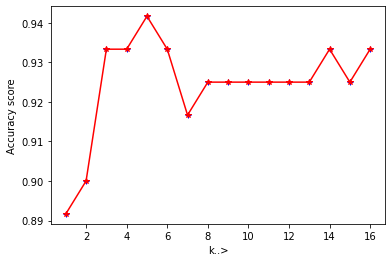

In [46]:
plt.plot(k_range,acc_list_sc,'b+')
plt.plot(k_range,acc_list_sc,'r*-')
plt.xlabel("k..>")
plt.ylabel("Accuracy score")
plt.show()


In [47]:
#Training with xx_std_scalefeature

In [48]:
Xstdtrain,Xstdtest,Ystdtrain,Ystdtest=train_test_split(xx_std_scalefeature,y_target,test_size=.30,random_state=101)

In [49]:
acc_list_std=[]
for i in range(1,k):
    knn_trainer_std=KNeighborsClassifier(n_neighbors=i)
    knn_learner_std=knn_trainer_std.fit(Xstdtrain,Ystdtrain)
    yp=knn_learner_std.predict(Xstdtest)
    knn_acc_std=accuracy_score(yp,Ystdtest)
    acc_list_std.append(knn_acc_std)
    print("Accuracy of knn is {} at k={}".format(knn_acc_std,i))

Accuracy of knn is 0.9 at k=1
Accuracy of knn is 0.9083333333333333 at k=2
Accuracy of knn is 0.9333333333333333 at k=3
Accuracy of knn is 0.9333333333333333 at k=4
Accuracy of knn is 0.9416666666666667 at k=5
Accuracy of knn is 0.9333333333333333 at k=6
Accuracy of knn is 0.9166666666666666 at k=7
Accuracy of knn is 0.925 at k=8
Accuracy of knn is 0.925 at k=9
Accuracy of knn is 0.925 at k=10
Accuracy of knn is 0.925 at k=11
Accuracy of knn is 0.925 at k=12
Accuracy of knn is 0.925 at k=13
Accuracy of knn is 0.9333333333333333 at k=14
Accuracy of knn is 0.925 at k=15
Accuracy of knn is 0.9333333333333333 at k=16


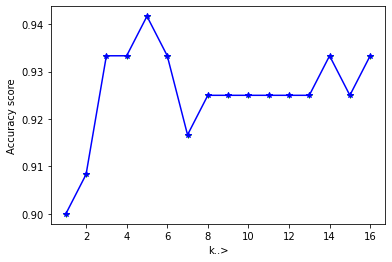

In [50]:
plt.plot(k_range,acc_list_std,'g+')
plt.plot(k_range,acc_list_std,'b*-')
plt.xlabel("k..>")
plt.ylabel("Accuracy score")
plt.show()
